<h1 id="tocheading">Use Pandas to Analyze MovieLens</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript("https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js")

<IPython.core.display.Javascript object>

## Get data

In [2]:
!pwd

/Users/mz175/git/notebooks


In [3]:
# ! curl  http://files.grouplens.org/datasets/movielens/ml-1m.zip --output ml-1m.zip

In [4]:
# !unzip -o ml-1m.zip

In [5]:
!ls ml-1m

README      movies.dat  ratings.dat users.dat


## Understand data


    movie  MovieID::Title::Genres
    users  UserID::Gender::Age::Occupation::Zip-code
    ratings UserID::MovieID::Rating::Timestamp

In [6]:
!cat ml-1M/README

SUMMARY

These files contain 1,000,209 anonymous ratings of approximately 3,900 movies 
made by 6,040 MovieLens users who joined MovieLens in 2000.

USAGE LICENSE

Neither the University of Minnesota nor any of the researchers
involved can guarantee the correctness of the data, its suitability
for any particular purpose, or the validity of results based on the
use of the data set.  The data set may be used for any research
purposes under the following conditions:

     * The user may not state or imply any endorsement from the
       University of Minnesota or the GroupLens Research Group.

     * The user must acknowledge the use of the data set in
       publications resulting from the use of the data set
       (see below for citation information).

     * The user may not redistribute the data without separate
       permission.

     * The user may not use this information for any commercial or
       revenue-bearing purposes without first obtaining permission
       from a facult

In [7]:
!head ml-1M/ratings.dat

1::1193::5::978300760
1::661::3::978302109
1::914::3::978301968
1::3408::4::978300275
1::2355::5::978824291
1::1197::3::978302268
1::1287::5::978302039
1::2804::5::978300719
1::594::4::978302268
1::919::4::978301368


In [8]:
!head ml-1M/movies.dat

1::Toy Story (1995)::Animation|Children's|Comedy
2::Jumanji (1995)::Adventure|Children's|Fantasy
3::Grumpier Old Men (1995)::Comedy|Romance
4::Waiting to Exhale (1995)::Comedy|Drama
5::Father of the Bride Part II (1995)::Comedy
6::Heat (1995)::Action|Crime|Thriller
7::Sabrina (1995)::Comedy|Romance
8::Tom and Huck (1995)::Adventure|Children's
9::Sudden Death (1995)::Action
10::GoldenEye (1995)::Action|Adventure|Thriller


## Load Data 

In [9]:
import pandas as pd
df = pd.read_csv('./ml-1M/ratings.dat', sep='::',
                 engine='python',
                 names=["userId", "movieId", "rating", "timestamp"])
df.head()

,userId,movieId,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [10]:
df = df.drop('timestamp', axis=1)

In [11]:
df.head()

,userId,movieId,rating
0,1,1193,5
1,1,661,3
2,1,914,3
3,1,3408,4
4,1,2355,5


## Calculate Ratings: Avg, Count

In [12]:
grouped = df.groupby('movieId')

In [13]:
avg_ratings_pdf = grouped.agg({'rating':['mean','count']})
avg_ratings_pdf.head()

rating      
             mean count
movieId                
1        4.146846  2077
2        3.201141   701
3        3.016736   478
4        2.729412   170
5        3.006757   296

In [14]:
avg_ratings_pdf.columns=['mean', 'count']
avg_ratings_pdf.head()

,mean,count
movieId,,
1,4.146846,2077
2,3.201141,701
3,3.016736,478
4,2.729412,170
5,3.006757,296


## Visualize Ratings

<AxesSubplot:xlabel='mean', ylabel='count'>

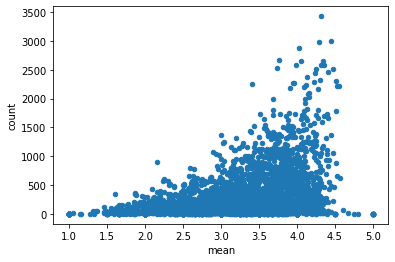

In [15]:
avg_ratings_pdf.plot.scatter(x='mean', y='count')

## Find Best Movies

### Join ratings with movie

In [16]:
movies_pdf = pd.read_csv('./ml-1M/movies.dat', sep='::',
                 engine='python',
                 names=["movieId", "Title", "Genres"])
movies_pdf.head()

,movieId,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [17]:
movie_ratings_pdf = movies_pdf.join(avg_ratings_pdf, on='movieId')
movie_ratings_pdf.head()

,movieId,Title,Genres,mean,count
0,1,Toy Story (1995),Animation|Children's|Comedy,4.146846,2077.0
1,2,Jumanji (1995),Adventure|Children's|Fantasy,3.201141,701.0
2,3,Grumpier Old Men (1995),Comedy|Romance,3.016736,478.0
3,4,Waiting to Exhale (1995),Comedy|Drama,2.729412,170.0
4,5,Father of the Bride Part II (1995),Comedy,3.006757,296.0


### Most Rated Movies

In [18]:
movie_ratings_pdf.sort_values(by='count', ascending=False).head(10)

,movieId,Title,Genres,mean,count
2789,2858,American Beauty (1999),Comedy|Drama,4.317386,3428.0
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4.453694,2991.0
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Drama|Sci-Fi|War,4.292977,2990.0
1192,1210,Star Wars: Episode VI - Return of the Jedi (1983),Action|Adventure|Romance|Sci-Fi|War,4.022893,2883.0
476,480,Jurassic Park (1993),Action|Adventure|Sci-Fi,3.763847,2672.0
1959,2028,Saving Private Ryan (1998),Action|Drama|War,4.337354,2653.0
585,589,Terminator 2: Judgment Day (1991),Action|Sci-Fi|Thriller,4.058513,2649.0
2502,2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,4.315830,2590.0
1250,1270,Back to the Future (1985),Comedy|Sci-Fi,3.990321,2583.0
589,593,"Silence of the Lambs, The (1991)",Drama|Thriller,4.351823,2578.0


### Highest Rated Movies

In [19]:
movie_ratings_pdf.sort_values(by='mean', ascending=False).head(10)

,movieId,Title,Genres,mean,count
977,989,Schlafes Bruder (Brother of Sleep) (1995),Drama,5.0,1.0
3811,3881,Bittersweet Motel (2000),Documentary,5.0,1.0
1762,1830,Follow the Bitch (1998),Comedy,5.0,1.0
3313,3382,Song of Freedom (1936),Drama,5.0,1.0
777,787,"Gate of Heavenly Peace, The (1995)",Documentary,5.0,3.0
3211,3280,"Baby, The (1973)",Horror,5.0,1.0
3538,3607,One Little Indian (1973),Comedy|Drama|Western,5.0,1.0
3164,3233,Smashing Time (1967),Comedy,5.0,2.0
3103,3172,Ulysses (Ulisse) (1954),Adventure,5.0,1.0
3587,3656,Lured (1947),Crime,5.0,1.0


### Highest Rating Movies, Filtered

In [20]:
movie_ratings_pdf.query('count > 500').sort_values(by='mean', ascending=False).head(10)

,movieId,Title,Genres,mean,count
1950,2019,Seven Samurai (The Magnificent Seven) (Shichin...,Action|Drama,4.560510,628.0
315,318,"Shawshank Redemption, The (1994)",Drama,4.554558,2227.0
847,858,"Godfather, The (1972)",Action|Crime|Drama,4.524966,2223.0
735,745,"Close Shave, A (1995)",Animation|Comedy|Thriller,4.520548,657.0
49,50,"Usual Suspects, The (1995)",Crime|Thriller,4.517106,1783.0
523,527,Schindler's List (1993),Drama|War,4.510417,2304.0
1132,1148,"Wrong Trousers, The (1993)",Animation|Comedy,4.507937,882.0
1180,1198,Raiders of the Lost Ark (1981),Action|Adventure,4.477725,2514.0
892,904,Rear Window (1954),Mystery|Thriller,4.476190,1050.0
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,4.453694,2991.0


## Further Questions

    * what if the dataset is bigger?
    * how to make a personalized movie recommendar?